In [17]:
import numpy as np
import pandas as pd

### Create pandas objects

In [21]:
s = pd.Series([1,2,3,np.nan,4,5])
s

0    1.0
1    2.0
2    3.0
3    NaN
4    4.0
5    5.0
dtype: float64

In [22]:
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [25]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,0.530584,0.295378,-0.252267,0.871488
2013-01-02,-0.136370,-1.863124,0.984676,0.215256
2013-01-03,0.438008,0.571418,-1.338395,0.138996
2013-01-04,-1.301478,-0.337485,-0.492467,1.877473
2013-01-05,1.315375,-0.308842,-2.441343,-0.235574
2013-01-06,-0.968619,1.178798,0.973129,1.555113


In [39]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2

# "Python dictionary (key-value pair
# "Key": Value

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [44]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [45]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

### view data stats/details

In [47]:
df.tail(5)

,A,B,C,D
2013-01-02,-0.136370,-1.863124,0.984676,0.215256
2013-01-03,0.438008,0.571418,-1.338395,0.138996
2013-01-04,-1.301478,-0.337485,-0.492467,1.877473
2013-01-05,1.315375,-0.308842,-2.441343,-0.235574
2013-01-06,-0.968619,1.178798,0.973129,1.555113


In [49]:
df.head(3)

,A,B,C,D
2013-01-01,0.530584,0.295378,-0.252267,0.871488
2013-01-02,-0.136370,-1.863124,0.984676,0.215256
2013-01-03,0.438008,0.571418,-1.338395,0.138996


In [59]:
df.to_numpy()

array([[ 0.53058444,  0.29537759, -0.2522671 ,  0.87148828],
       [-0.13636971, -1.86312362,  0.98467564,  0.21525601],
       [ 0.43800793,  0.57141786, -1.33839457,  0.13899596],
       [-1.30147759, -0.33748541, -0.492467  ,  1.87747347],
       [ 1.31537517, -0.30884238, -2.44134279, -0.23557438],
       [-0.96861942,  1.17879821,  0.97312864,  1.55511302]])

In [60]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.020417,-0.077310,-0.427778,0.737125
std,0.985063,1.043837,1.332383,0.844251
min,-1.301478,-1.863124,-2.441343,-0.235574
25%,-0.760557,-0.330325,-1.126913,0.158061
50%,0.150819,-0.006732,-0.372367,0.543372
75%,0.507440,0.502408,0.666780,1.384207
max,1.315375,1.178798,0.984676,1.877473


In [61]:
df2.describe()

,A,C,D
count,4.0,4.0,4.0
mean,1.0,1.0,3.0
std,0.0,0.0,0.0
min,1.0,1.0,3.0
25%,1.0,1.0,3.0
50%,1.0,1.0,3.0
75%,1.0,1.0,3.0
max,1.0,1.0,3.0


In [66]:
df.sort_index(axis=1, ascending=True)

,A,B,C,D
2013-01-01,0.530584,0.295378,-0.252267,0.871488
2013-01-02,-0.136370,-1.863124,0.984676,0.215256
2013-01-03,0.438008,0.571418,-1.338395,0.138996
2013-01-04,-1.301478,-0.337485,-0.492467,1.877473
2013-01-05,1.315375,-0.308842,-2.441343,-0.235574
2013-01-06,-0.968619,1.178798,0.973129,1.555113


In [73]:
df.sort_values(by='B')


,A,B,C,D
2013-01-02,-0.136370,-1.863124,0.984676,0.215256
2013-01-04,-1.301478,-0.337485,-0.492467,1.877473
2013-01-05,1.315375,-0.308842,-2.441343,-0.235574
2013-01-01,0.530584,0.295378,-0.252267,0.871488
2013-01-03,0.438008,0.571418,-1.338395,0.138996
2013-01-06,-0.968619,1.178798,0.973129,1.555113


### selection by label

In [80]:
df['20130102':'20130104']

#Select numbers in between

,A,B,C,D
2013-01-02,-0.136370,-1.863124,0.984676,0.215256
2013-01-03,0.438008,0.571418,-1.338395,0.138996
2013-01-04,-1.301478,-0.337485,-0.492467,1.877473


In [81]:
df.loc[:,['A','B']]

#[index of row, [index of column]]
# : means "everything"

,A,B
2013-01-01,0.530584,0.295378
2013-01-02,-0.136370,-1.863124
2013-01-03,0.438008,0.571418
2013-01-04,-1.301478,-0.337485
2013-01-05,1.315375,-0.308842
2013-01-06,-0.968619,1.178798


In [82]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-0.136370,-1.863124
2013-01-03,0.438008,0.571418
2013-01-04,-1.301478,-0.337485


In [83]:
df.loc['20130102','A']

-0.1363697071457036

In [84]:
df[['A','B']]

,A,B
2013-01-01,0.530584,0.295378
2013-01-02,-0.136370,-1.863124
2013-01-03,0.438008,0.571418
2013-01-04,-1.301478,-0.337485
2013-01-05,1.315375,-0.308842
2013-01-06,-0.968619,1.178798


In [86]:
df.iloc[3]

A   -1.301478
B   -0.337485
C   -0.492467
D    1.877473
Name: 2013-01-04 00:00:00, dtype: float64

### Selection by position

In [87]:
df.iloc[1:3, 0:2]

,A,B
2013-01-02,-0.136370,-1.863124
2013-01-03,0.438008,0.571418


In [88]:
df.iloc[[1,2,5],[0,3]]

,A,D
2013-01-02,-0.136370,0.215256
2013-01-03,0.438008,0.138996
2013-01-06,-0.968619,1.555113


### Selection by boolean indexing

In [97]:
df[df['A']>0.5 and df['B']>0]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [91]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

,A,B,C,D,E
2013-01-01,0.530584,0.295378,-0.252267,0.871488,one
2013-01-02,-0.136370,-1.863124,0.984676,0.215256,one
2013-01-03,0.438008,0.571418,-1.338395,0.138996,two
2013-01-04,-1.301478,-0.337485,-0.492467,1.877473,three
2013-01-05,1.315375,-0.308842,-2.441343,-0.235574,four
2013-01-06,-0.968619,1.178798,0.973129,1.555113,three


In [99]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,0.438008,0.571418,-1.338395,0.138996,two
2013-01-05,1.315375,-0.308842,-2.441343,-0.235574,four


### Setting value

In [100]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
df["F"] = s1
df

,A,B,C,D,F
2013-01-01,0.530584,0.295378,-0.252267,0.871488,NaN
2013-01-02,-0.136370,-1.863124,0.984676,0.215256,1.0
2013-01-03,0.438008,0.571418,-1.338395,0.138996,2.0
2013-01-04,-1.301478,-0.337485,-0.492467,1.877473,3.0
2013-01-05,1.315375,-0.308842,-2.441343,-0.235574,4.0
2013-01-06,-0.968619,1.178798,0.973129,1.555113,5.0


In [103]:
df['G'] = df['A'] / df['B']
df

,A,B,C,D,F,G
2013-01-01,0.530584,0.295378,-0.252267,0.871488,NaN,1.796292
2013-01-02,-0.136370,-1.863124,0.984676,0.215256,1.0,0.073194
2013-01-03,0.438008,0.571418,-1.338395,0.138996,2.0,0.766528
2013-01-04,-1.301478,-0.337485,-0.492467,1.877473,3.0,3.856397
2013-01-05,1.315375,-0.308842,-2.441343,-0.235574,4.0,-4.259050
2013-01-06,-0.968619,1.178798,0.973129,1.555113,5.0,-0.821701


### Missing data

In [107]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])

In [108]:
df1.loc[dates[0] : dates[1], "E"] = 1
df1

,A,B,C,D,F,G,E
2013-01-01,0.530584,0.295378,-0.252267,0.871488,NaN,1.796292,1.0
2013-01-02,-0.136370,-1.863124,0.984676,0.215256,1.0,0.073194,1.0
2013-01-03,0.438008,0.571418,-1.338395,0.138996,2.0,0.766528,NaN
2013-01-04,-1.301478,-0.337485,-0.492467,1.877473,3.0,3.856397,NaN


In [112]:
df1.dropna(how='any')

,A,B,C,D,F,G,E
2013-01-02,-0.13637,-1.863124,0.984676,0.215256,1.0,0.073194,1.0


In [114]:
df1.fillna(value=5)

,A,B,C,D,F,G,E
2013-01-01,0.530584,0.295378,-0.252267,0.871488,5.0,1.796292,1.0
2013-01-02,-0.136370,-1.863124,0.984676,0.215256,1.0,0.073194,1.0
2013-01-03,0.438008,0.571418,-1.338395,0.138996,2.0,0.766528,5.0
2013-01-04,-1.301478,-0.337485,-0.492467,1.877473,3.0,3.856397,5.0


In [121]:
df1.fillna(method='backfill')

,A,B,C,D,F,G,E
2013-01-01,0.530584,0.295378,-0.252267,0.871488,1.0,1.796292,1.0
2013-01-02,-0.136370,-1.863124,0.984676,0.215256,1.0,0.073194,1.0
2013-01-03,0.438008,0.571418,-1.338395,0.138996,2.0,0.766528,NaN
2013-01-04,-1.301478,-0.337485,-0.492467,1.877473,3.0,3.856397,NaN


In [ ]:
df1.fillna(method='ffill')

### Apply

In [122]:
df

,A,B,C,D,F,G
2013-01-01,0.530584,0.295378,-0.252267,0.871488,NaN,1.796292
2013-01-02,-0.136370,-1.863124,0.984676,0.215256,1.0,0.073194
2013-01-03,0.438008,0.571418,-1.338395,0.138996,2.0,0.766528
2013-01-04,-1.301478,-0.337485,-0.492467,1.877473,3.0,3.856397
2013-01-05,1.315375,-0.308842,-2.441343,-0.235574,4.0,-4.259050
2013-01-06,-0.968619,1.178798,0.973129,1.555113,5.0,-0.821701


In [123]:
df.apply(np.cumsum)

,A,B,C,D,F,G
2013-01-01,0.530584,0.295378,-0.252267,0.871488,NaN,1.796292
2013-01-02,0.394215,-1.567746,0.732409,1.086744,1.0,1.869486
2013-01-03,0.832223,-0.996328,-0.605986,1.225740,3.0,2.636015
2013-01-04,-0.469255,-1.333814,-1.098453,3.103214,6.0,6.492411
2013-01-05,0.846120,-1.642656,-3.539796,2.867639,10.0,2.233361
2013-01-06,-0.122499,-0.463858,-2.566667,4.422752,15.0,1.411660


In [131]:
df.apply(np.cumsum, axis=1)

,A,B,C,D,F,G
2013-01-01,0.530584,0.825962,0.573695,1.445183,NaN,3.241475
2013-01-02,-0.136370,-1.999493,-1.014818,-0.799562,0.200438,0.273632
2013-01-03,0.438008,1.009426,-0.328969,-0.189973,1.810027,2.576555
2013-01-04,-1.301478,-1.638963,-2.131430,-0.253957,2.746043,6.602440
2013-01-05,1.315375,1.006533,-1.434810,-1.670384,2.329616,-1.929434
2013-01-06,-0.968619,0.210179,1.183307,2.738420,7.738420,6.916720


In [136]:
df['A'].mean()

-0.02041652925820364

### Concat

In [137]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.037155,0.115129,-0.212590,1.558249
1,-0.088813,-2.226717,0.974569,-0.559383
2,-0.353794,-0.015908,-1.959060,1.569517
3,-0.356313,0.443063,0.373864,-1.936406
4,0.633426,-1.149418,0.021297,-0.478950
5,0.497875,-0.573357,1.228569,2.377119
6,0.868223,1.155227,-0.451243,-0.175847
7,1.267465,1.011932,-0.240778,0.359238
8,1.064242,-1.135736,0.714159,-1.585375
9,-1.639957,1.847762,-1.169492,-1.047276


In [138]:
pieces = [df[:3], df[3:7], df[7:]]

In [139]:
pd.concat(pieces)

,0,1,2,3
0,-0.037155,0.115129,-0.212590,1.558249
1,-0.088813,-2.226717,0.974569,-0.559383
2,-0.353794,-0.015908,-1.959060,1.569517
3,-0.356313,0.443063,0.373864,-1.936406
4,0.633426,-1.149418,0.021297,-0.478950
5,0.497875,-0.573357,1.228569,2.377119
6,0.868223,1.155227,-0.451243,-0.175847
7,1.267465,1.011932,-0.240778,0.359238
8,1.064242,-1.135736,0.714159,-1.585375
9,-1.639957,1.847762,-1.169492,-1.047276


### Merge

In [140]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
left

,key,lval
0,foo,1
1,foo,2


In [141]:
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
right

,key,rval
0,foo,4
1,foo,5


In [142]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [143]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
left

,key,lval
0,foo,1
1,bar,2


In [144]:
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})
right

,key,rval
0,foo,4
1,bar,5


In [146]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### Grouping

In [147]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,1.492333,-1.200733
1,bar,one,0.850754,0.217989
2,foo,two,-1.825930,-0.947704
3,bar,three,-0.274192,1.407862
4,foo,two,0.974845,0.143661
5,bar,two,1.230579,0.366421
6,foo,one,-1.487667,-0.510984
7,foo,three,1.402420,-1.330504


### Categoricals

In [148]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,-0.725828,0.258003
1,bar,one,-0.978191,2.223722
2,foo,two,0.545263,0.598049
3,bar,three,-0.398745,-1.681693
4,foo,two,0.939617,1.276474
5,bar,two,1.064966,0.620973
6,foo,one,-0.059633,0.821431
7,foo,three,-0.465738,-0.781516


In [154]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False)
df_A=df[['A']]
df_A_1hot = cat_encoder.fit_transform(df_A)
df_A_1hot

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [155]:
df['A'].unique()

array(['foo', 'bar'], dtype=object)

In [ ]:
cat_encoder.categories_

In [159]:
df['isbar']=df_A_1hot[:,0]
df['isfoo']=df_A_1hot[:,1]
df

,A,B,C,D,bar,isbar,isfoo
0,foo,one,-0.725828,0.258003,0.0,0.0,1.0
1,bar,one,-0.978191,2.223722,1.0,1.0,0.0
2,foo,two,0.545263,0.598049,0.0,0.0,1.0
3,bar,three,-0.398745,-1.681693,1.0,1.0,0.0
4,foo,two,0.939617,1.276474,0.0,0.0,1.0
5,bar,two,1.064966,0.620973,1.0,1.0,0.0
6,foo,one,-0.059633,0.821431,0.0,0.0,1.0
7,foo,three,-0.465738,-0.781516,0.0,0.0,1.0


In [ ]:
# What onehot does
isthree, istwoo, isone
one: 001
two: 010
three: 100

### Plotting

In [160]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [164]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()

<AxesSubplot:>

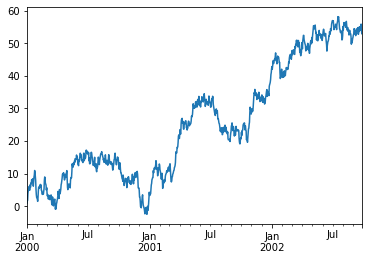

In [163]:
ts.plot()

In [168]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)
df = df.cumsum()
df

,A,B,C,D
2000-01-01,-0.127903,-0.870094,-0.303600,0.999036
2000-01-02,-1.447652,0.778542,-1.672786,0.393480
2000-01-03,-0.510299,0.805619,-1.718901,-0.989766
2000-01-04,-0.466067,0.060563,-1.595542,-1.573510
2000-01-05,-0.840125,0.066320,-2.680655,-1.982249
...,...,...,...,...
2002-09-22,-15.704219,44.369541,-36.143671,-0.227017
2002-09-23,-16.047295,44.828722,-34.673562,-0.900425
2002-09-24,-15.412299,44.971537,-35.067612,-1.306519
2002-09-25,-14.956034,44.131154,-34.532483,-1.650490


<Figure size 432x288 with 0 Axes>

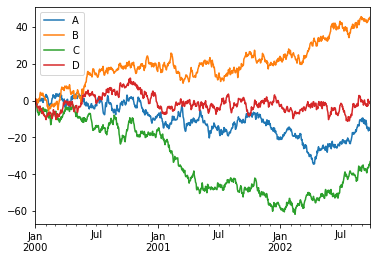

In [169]:
plt.figure()
df.plot()
plt.legend(loc='best') #If you want to add legend to the plot (loc = location, best = let computer figure out)

### Outlier detection

In [170]:
df = pd.DataFrame(np.random.randn(100, 3))
df

,0,1,2
0,-1.347567,-0.322012,-1.103659
1,-0.055679,0.345519,-1.402635
2,1.122257,0.860921,-1.758126
3,-0.248276,-0.415997,-1.421299
4,1.278335,2.013080,0.150130
...,...,...,...
95,0.127074,-0.265109,1.207360
96,-0.302603,-1.262289,0.924142
97,0.229547,0.823556,0.696661
98,-0.764530,-0.632071,-1.888808


In [172]:
from scipy import stats
df[(np.abs(stats.zscore(df)<2).all(axis=1))] #where 2 = 2 standard deviation away (deletes outliers)

,0,1,2
0,-1.347567,-0.322012,-1.103659
1,-0.055679,0.345519,-1.402635
2,1.122257,0.860921,-1.758126
3,-0.248276,-0.415997,-1.421299
4,1.278335,2.013080,0.150130
...,...,...,...
95,0.127074,-0.265109,1.207360
96,-0.302603,-1.262289,0.924142
97,0.229547,0.823556,0.696661
98,-0.764530,-0.632071,-1.888808


### Boston Housing dataset

  **CRIM**: Per capita crime rate by town

  **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft

  **INDUS**: Proportion of non-retail business acres per town

  **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

  **NOX**: Nitric oxide concentration (parts per 10 million)

  **RM**: Average number of rooms per dwelling

  **AGE**: Proportion of owner-occupied units built prior to 1940

  **DIS**: Weighted distances to five Boston employment centers

  **RAD**: Index of accessibility to radial highways

  **TAX**: Full-value property tax rate per $10,000

  **B**: 1000(Bk - 0.63)², where Bk is the proportion of [people of African American descent] by town

  **LSTAT**: Percentage of lower status of the population

  **MEDV**: Median value of owner-occupied homes in $1000s
  
  
  



In [173]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
%matplotlib inline #Used to plot stuff within the cells and not open extra windows

In [178]:
b = pd.read_csv('dataset.csv')

In [179]:
b.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [180]:
b.isnull().sum()

CRIM       0
ZN         0
INDUS      1
CHAS       0
NOX        2
RM         1
AGE        2
DIS        2
RAD        0
TAX        0
PTRATIO    1
B          0
LSTAT      1
MEDV       0
dtype: int64

In [182]:
b.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,505.000000,506.000000,504.000000,505.000000,504.000000,506.000000,506.000000,505.000000,506.000000,505.000000,506.000000
mean,3.613524,11.363636,11.143248,0.069170,0.554648,6.285349,68.615873,4.332016,408.237154,18.450495,356.674032,12.641050,22.532806
std,8.601545,23.322453,6.865611,0.253994,0.116074,0.703130,28.131343,1.417166,168.537116,2.164120,91.294864,7.143022,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885000,45.075000,4.000000,279.000000,17.400000,375.377500,6.930000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,4.000000,330.000000,19.000000,391.440000,11.340000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.000000,666.000000,20.200000,396.225000,16.940000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,8.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [183]:
b.fillna(method='backfill', inplace=True) #inplace overrides the original data frame

In [184]:
b.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

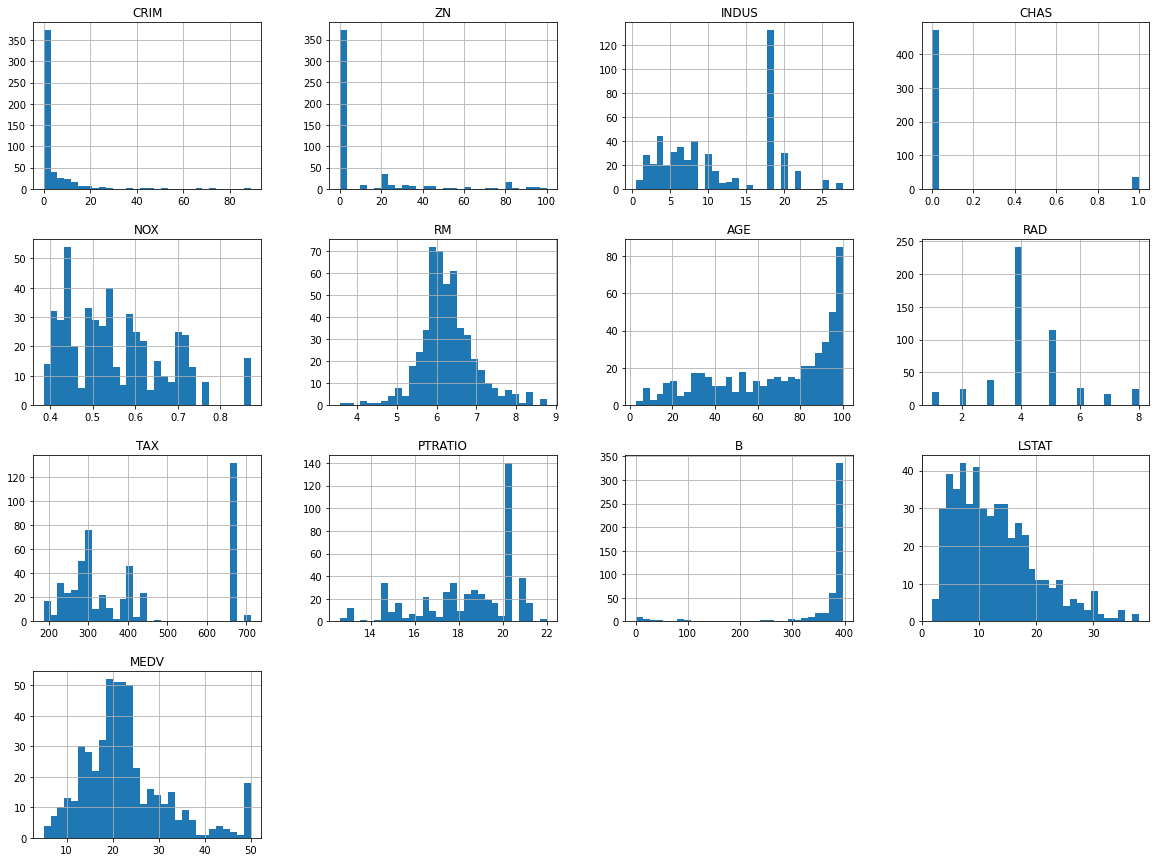

In [187]:
import matplotlib.pyplot as plt
b.hist(bins=30, figsize=(20, 15))
plt.show()

<AxesSubplot:>

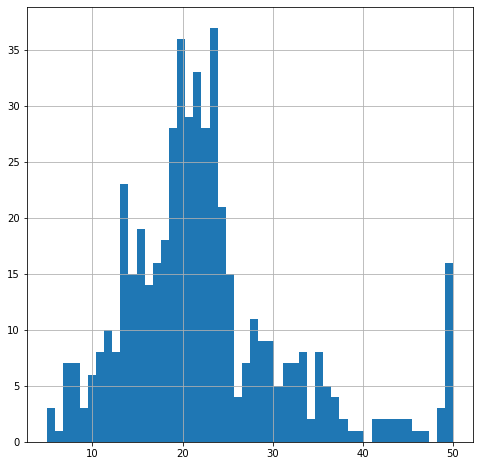

In [190]:
b['MEDV'].hist(bins=50, figsize=(8,8))

**Correlation matrix**

In [191]:
correlation_matrix = b.corr()

In [193]:
plt.figure(figsize=(20,15))

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<AxesSubplot:>

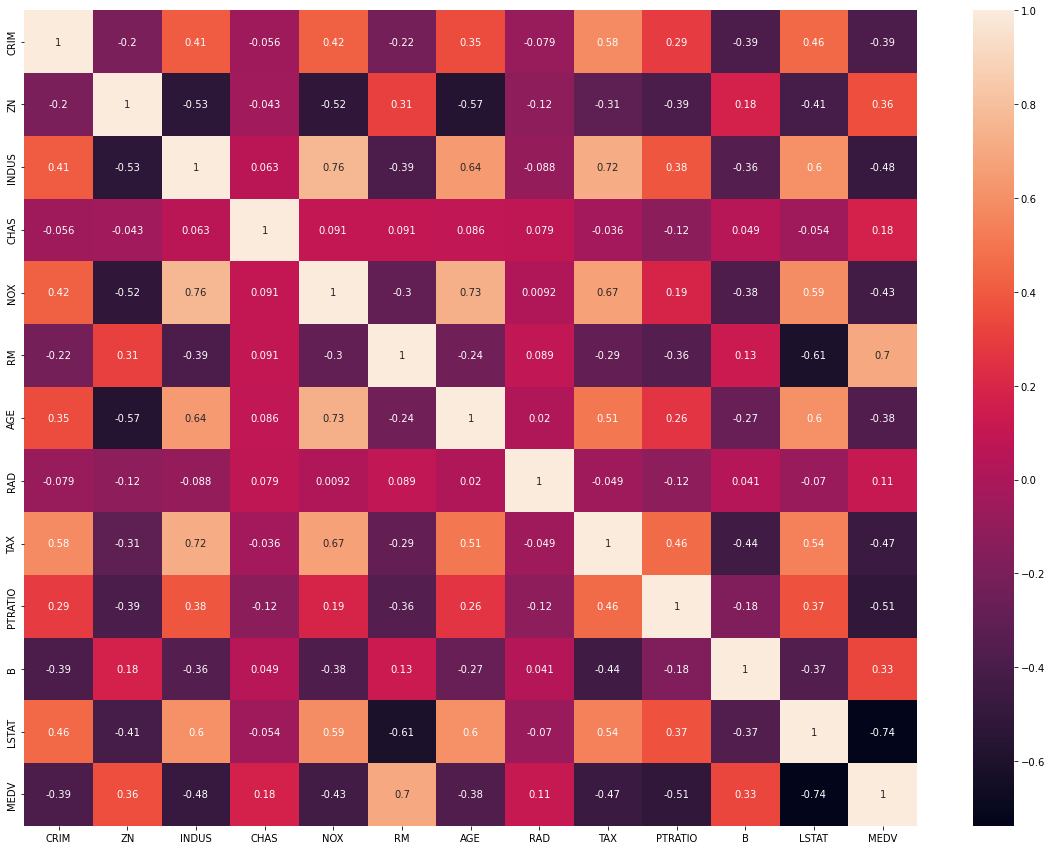

In [197]:
plt.figure(figsize=(20,15))
sns.heatmap(data=correlation_matrix, annot=True)

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

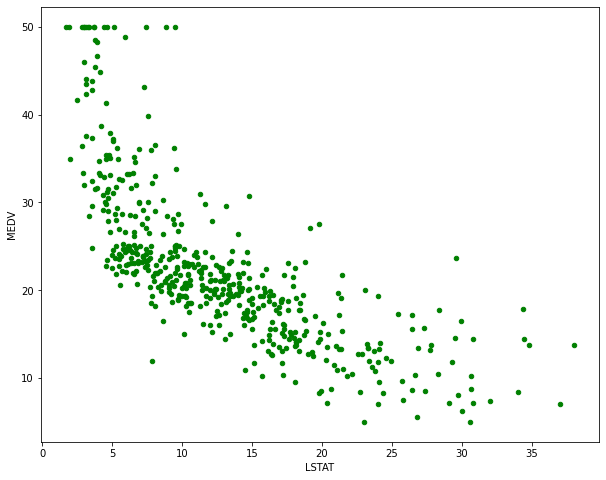

In [198]:
b.plot(kind='scatter', x='LSTAT', y='MEDV', color='green', figsize=(10,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

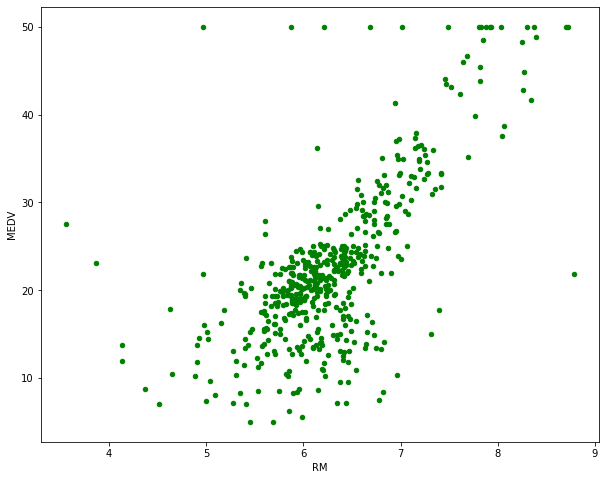

In [199]:
b.plot(kind='scatter', x='RM', y='MEDV', color='green', figsize=(10,8))

**Prepare the data for training**

In [200]:
X = b[['RM', 'LSTAT']]
Y = b['MEDV']

**Split the data into training and testing sets**

In [202]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [204]:
X_train

,RM,LSTAT
477,5.304,24.91
15,5.834,8.47
332,6.031,7.83
423,6.103,23.29
19,5.727,11.28
...,...,...
106,5.836,18.66
270,5.856,13.00
348,6.635,5.99
435,6.629,23.27


In [206]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [207]:
# model evaluation for training set

y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

# model evaluation for testing set

y_test_predict = lin_model.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)



In [208]:
r2

0.5744608610772142

In [209]:
rmse

5.586268427133994